## Analyze Interpretability Data!

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/utils/')
# sys.path.append('/glade/u/home/wchapman/ENSOvsMJO/utils/')
from exp_hp import get_hp

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [2]:
# print(confvsacc.shape) # 5,100
# print(model1_rawpreds.shape)  # 5,11584,2
# print(model_rawpreds.shape)   # 5,11584,2
# print(model2_fracpred.shape)  # 5
# print(model12_fracpred.shape) # 5

In [3]:
EXP_NAME = 'default'
hps = get_hp(EXP_NAME)

LEADS = np.arange(7,31)
AVGS = np.arange(7,32)
SEEDS = np.arange(1,6)

## Contribution Analysis:

## Confidence vs Accuracy:

In [5]:
LEADS=[7]
AVGS=[7]
SEEDS=[22]
confvsacc_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/scratch/wchapman/ENSOmjo_ML_models/'

        finame_confvsacc = 'confvsacc_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        confvsacc_all[l,a] = np.load(ddir_load+finame_confvsacc)

        # finame_rawpred  = 'model1_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model1_rawpreds = np.load(ddir_load+finame_rawpred)
        # finame_rawpred  = 'model2_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model2_rawpreds = np.load(ddir_load+finame_rawpred)
        # finame_rawpred  = 'model_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model_rawpreds  = np.load(ddir_load+finame_rawpred)

confvsacc_all = np.mean(confvsacc_all,axis=2)

LEAD: 7


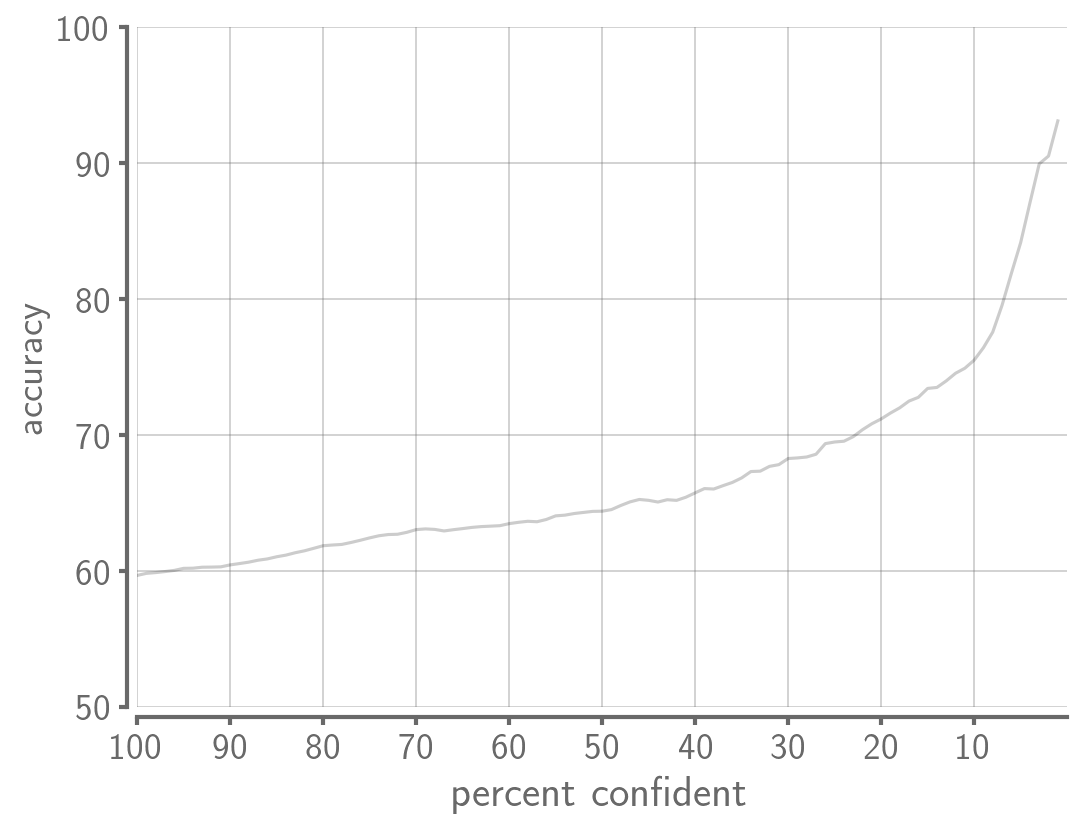

In [8]:
valColor = (141/255,171/255,127/255,1.)
FS = 18
plt.figure(figsize=(8, 6))


for l,lead in enumerate(LEADS):
    ax = plt.subplot(1,1,1)
    adjust_spines(ax, ['left', 'bottom'])
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('dimgrey')
    ax.spines['bottom'].set_color('dimgrey')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    
    
    plt.plot(confvsacc_all[l,0],'k',alpha=0.2)
    # plt.plot(confvsacc_all[l,7],'grey',alpha=0.2)
    # plt.plot(confvsacc_all[l,14],'xkcd:steel blue',alpha=0.2)
    # plt.plot(confvsacc_all[l,21],'xkcd:light blue',alpha=0.2)

    plt.ylim(50,100)
    plt.yticks(np.arange(50,110,10),np.arange(50,110,10),fontsize=FS,color='dimgrey')
    plt.ylabel('accuracy',fontsize=FS+1,color='dimgrey')
    plt.xlim(0,100)
    plt.xticks(np.arange(0,100,10),np.arange(10,110,10)[::-1],fontsize=FS,color='dimgrey')
    plt.xlabel('percent confident',fontsize=FS+3,color='dimgrey')
    # plt.legend(frameon=False, fontsize=FS,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left", title='Z500 Averaging Windows')

plt.show()

## Variance of Predictions:

In [14]:
Complex_mod2 = np.load('/glade/scratch/wchapman/ENSOmjo_ML_models/model2_rawpred_LEAD_7_AVG_7__00001-00005.npy')
Complex_mod1 = np.load('/glade/scratch/wchapman/ENSOmjo_ML_models/model1_rawpred_LEAD_7_AVG_7__00001-00005.npy')
Simple_mod2 = np.load('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data//model2_rawpred_LEAD_7_AVG_7__00001-00005.npy')
Simple_mod1 = np.load('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data//model1_rawpred_LEAD_7_AVG_7__00001-00005.npy')

## Are they the same???
### 1st network is: 

HIDDENS2 = [8]

HIDDENS1 = [8]


### 2nd network is:

HIDDENS2 = [100,100,10,8]

HIDDENS1 = [100,100,10,8]

### Answer is:

- yes { :)

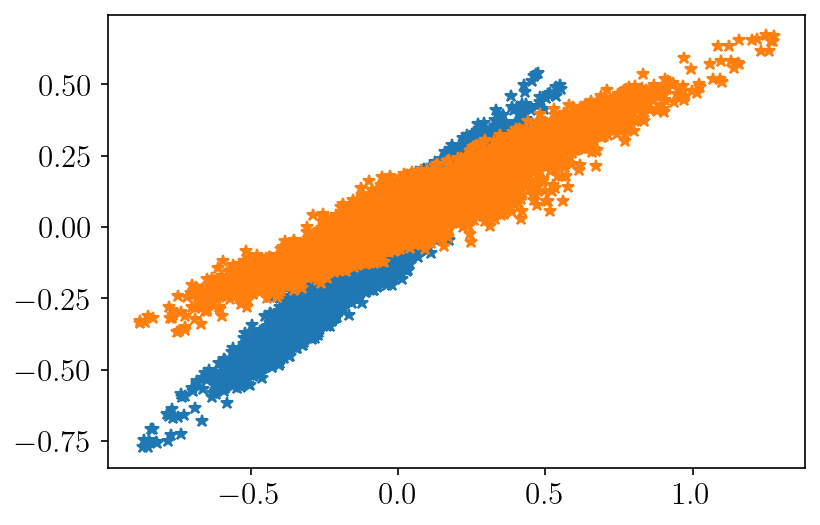

0.9641136552146602
0.955710846578102


In [21]:
plt.plot(Simple_mod2[0,:,0],Complex_mod2[0,:,0],'*')
plt.plot(Simple_mod2[0,:,1],Complex_mod2[0,:,1],'*')
plt.show()
print(np.corrcoef(Simple_mod2[0,:,0],Complex_mod2[0,:,0])[0,1])
print(np.corrcoef(Simple_mod2[0,:,1],Complex_mod2[0,:,1])[0,1])